<a href="https://colab.research.google.com/github/reza-pishva/6-MachineLearning-Python/blob/main/cnn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import os
import tensorflow as tf

In [112]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [113]:
data_dir = './drive/MyDrive/dataset'

In [114]:
image_exts = ['jpeg','jpg','bmp','png']

In [115]:
image_exts[0]

'jpeg'

In [ ]:
os.listdir(os.path.join(data_dir,'sad'))

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    print(image)

In [119]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
        image = cv2.imread(image_path)
        tip = imghdr.what(image_path)
        if tip not in image_exts:
          print('image not in ext list {}'.format(image_path))
          os.remove(image_path)
    except Exception as e:
      print('issue with image {}'.format(image_path))

array([[[141,  98, 171],
        [141,  98, 171],
        [142,  99, 172],
        ...,
        [135, 144, 217],
        [134, 143, 216],
        [134, 143, 216]],

       [[141,  98, 171],
        [141,  98, 171],
        [142,  99, 172],
        ...,
        [135, 144, 217],
        [135, 144, 217],
        [134, 143, 216]],

       [[141,  98, 171],
        [141,  98, 171],
        [142,  99, 172],
        ...,
        [134, 146, 218],
        [133, 145, 217],
        [133, 145, 217]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,   2,   0],
        [  3,   1,   0],
        [  1,   1,   1]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  3,   2,   0],
        [  1,   2,   0],
        [  1,   1,   1]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  3,   2,   0],
        [  1,   2,   0],
        [  0,   2,   0]]], dtype=uint8)
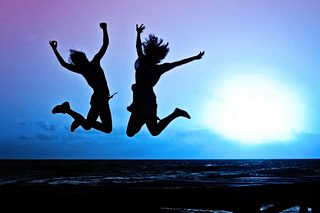

In [120]:
cv2.imread(os.path.join(data_dir,'happy','_happy_jumping_on_beach-40815.jpg'))

array([[[141,  98, 171],
        [141,  98, 171],
        [142,  99, 172],
        ...,
        [135, 144, 217],
        [134, 143, 216],
        [134, 143, 216]],

       [[141,  98, 171],
        [141,  98, 171],
        [142,  99, 172],
        ...,
        [135, 144, 217],
        [135, 144, 217],
        [134, 143, 216]],

       [[141,  98, 171],
        [141,  98, 171],
        [142,  99, 172],
        ...,
        [134, 146, 218],
        [133, 145, 217],
        [133, 145, 217]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,   2,   0],
        [  3,   1,   0],
        [  1,   1,   1]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  3,   2,   0],
        [  1,   2,   0],
        [  1,   1,   1]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  3,   2,   0],
        [  1,   2,   0],
        [  0,   2,   0]]], dtype=uint8)
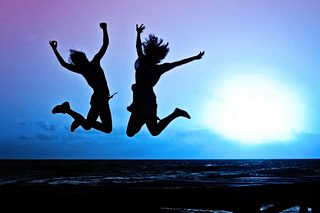

In [121]:
img = cv2.imread(os.path.join(data_dir,'happy','_happy_jumping_on_beach-40815.jpg'))
img

In [122]:
img.shape

(213, 320, 3)

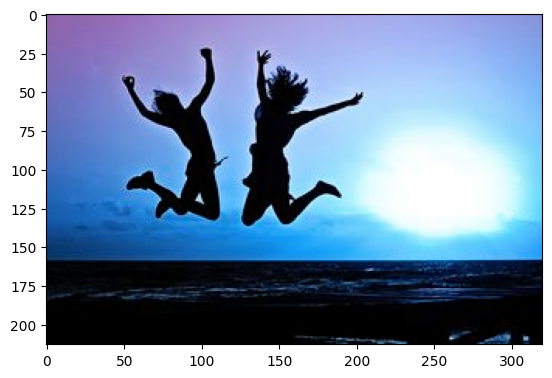

In [123]:
plt.imshow(img)

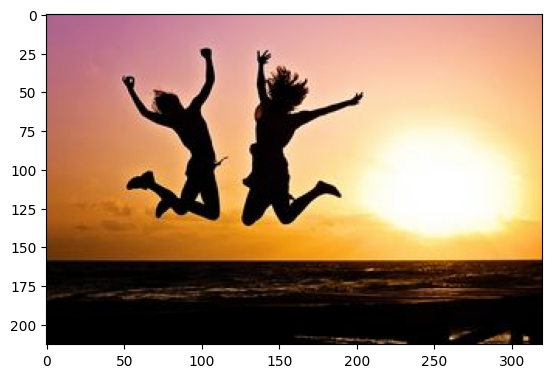

In [124]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [125]:
import numpy as np

In [126]:
tf.keras.utils.image_dataset_from_directory??

In [127]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)
data

Found 1117 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [128]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [ ]:
batch

In [130]:
len(batch)

2

In [131]:
batch[1]

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1], dtype=int32)

In [132]:
batch[0].shape

(32, 256, 256, 3)

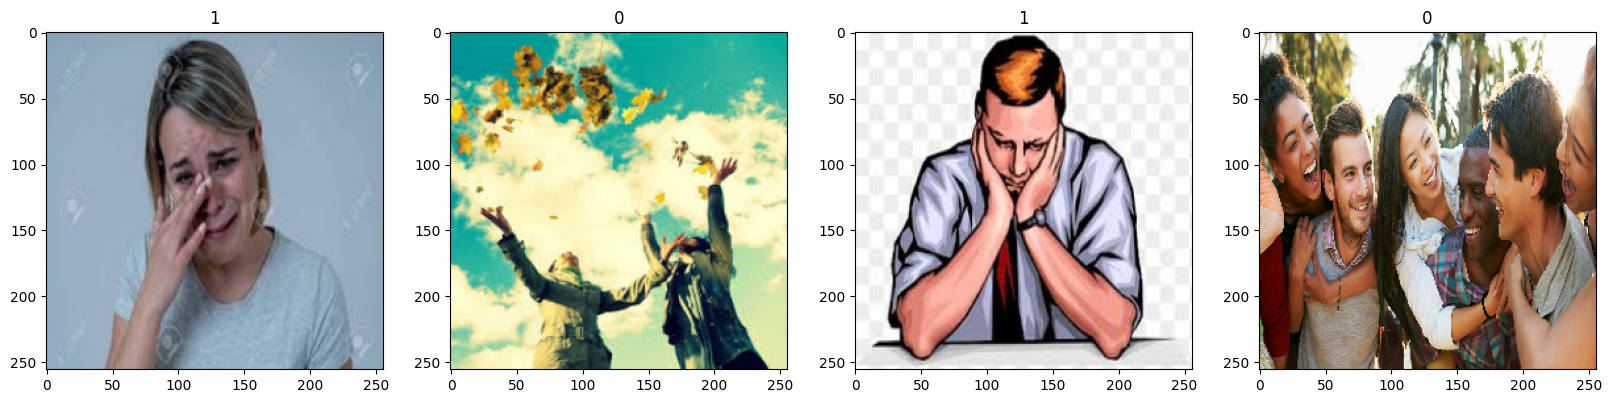

In [133]:
fig, ax =plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [134]:
scaled = batch[0]/255
scaled.max()

1.0

In [135]:
data = data.map(lambda x,y:(x/255,y))
scaled_iterator = data.as_numpy_iterator()
scaled_iterator.next()[0].max()

1.0

In [136]:
scaled_iterator.next()[0].max()

1.0

In [137]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.1)
test_size = int(len(data)*.1)

In [138]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size).skip(val_size).take(test_size)

In [139]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [140]:
model = Sequential()

In [141]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [142]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [149]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.FalseNegatives(),
    ],
)